In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import pandas as pd
import FukudaCsv


# アラームログが格納されているディレクトリを指定する. 空文字を指定した場合はサンプルデータを表示します．
dir_path_to_process = ''

# CSVのロード
df = FukudaCsv.load(dir_path_to_process)

figsize_ = 22, 8

記録時刻:2021-10-12 07:38:00 〜 2021-10-14 17:06:00,  2 days 09:28:00 (57時間)


In [2]:
df.head()

,Unnamed:0,No.,時刻,床番号,コード,発生要因,値,継続時間,レベル,継続時間int,hour,dayhour,dayhour10min,alarm_level,alarm_type,start_datetime,diff_datetime,diff_sec,diff_min
0,44933,1798,2021-10-12 07:38:00,CH1001,0x201F,心電図ノイズ混入,---,4,N(TECH_),4,07,10月12日07時,12日07時30分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:00:00,0.0,0
1,44932,1799,2021-10-12 07:38:00,CH1001,0x201F,心電図ノイズ混入,---,5,N(TECH_),5,07,10月12日07時,12日07時30分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:00:00,0.0,0
2,44931,1800,2021-10-12 07:49:00,CH1001,0x201F,心電図ノイズ混入,---,3,N(TECH_),3,07,10月12日07時,12日07時40分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:11:00,660.0,11
3,4956,2983,2021-10-12 08:09:00,CH1002,0x1010,ＳｐＯ2下限,(計測値)89 < (下限閾値)90,25,H(MEAS_),25,08,10月12日08時,12日08時00分台,H,(MEAS_),2021-10-12 07:38:00,0 days 00:31:00,1860.0,31
4,44906,1825,2021-10-12 08:11:00,CH1001,0x201F,心電図ノイズ混入,---,8,N(TECH_),8,08,10月12日08時,12日08時10分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:33:00,1980.0,33


<AxesSubplot:title={'center':'１時間ごとのバイタルアラーム数'}, xlabel='dayhour'>

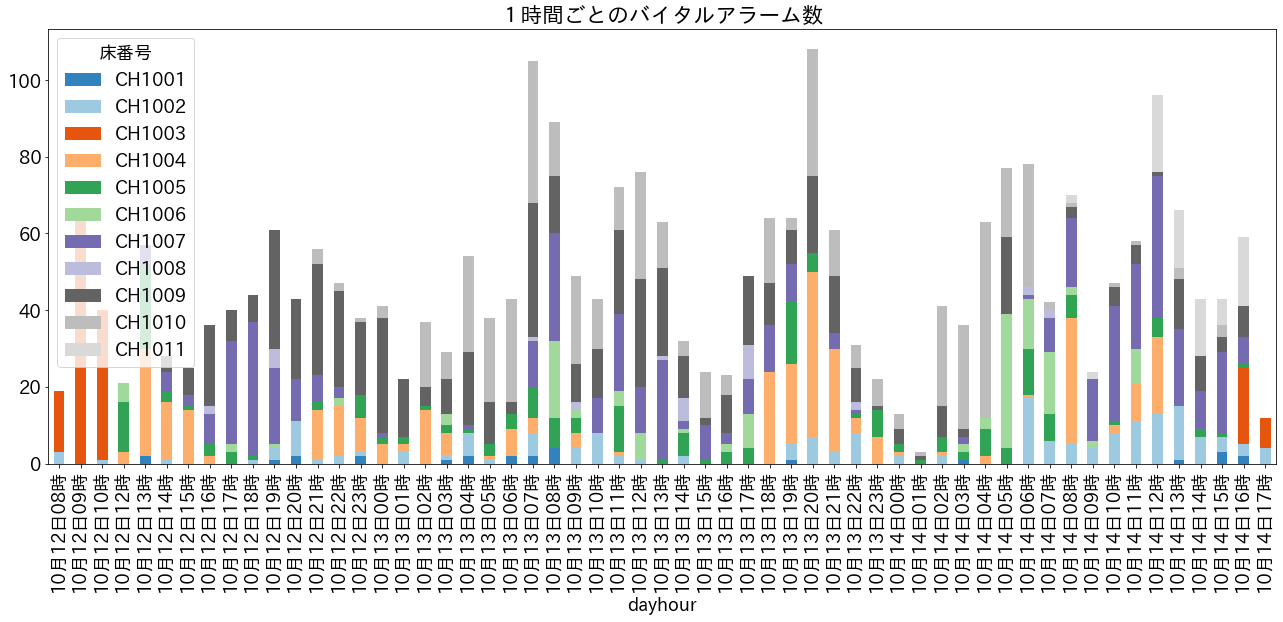

In [3]:
# バイタルアラームの１時間毎の件数を積み上げたて棒グラフにするために， まずはPivot Tableで集計する
pt = pd.pivot_table(
    df.query('alarm_level == "H"'),   # アラームレベルが H なデータのみを得る. 全アラームを対象にしたい場合は df に変更
    index=['dayhour'],                # 横軸を １時間毎 にする(dayhour列の値毎にデータを集計)
    columns='床番号',                  # CHは分けて表示
    values='コード',                    # どの値を集計するか（ここでは値が存在する列ならなんでもよい）
    aggfunc=len,                      # 集計方法はデータの件数とする
    fill_value=0                      # 欠損があれば 0 とする
)

# 積み上げたて棒グラフをプロットする
pt.plot.bar(figsize=figsize_, title=f"１時間ごとのバイタルアラーム数", stacked=True, colormap='tab20c')

<AxesSubplot:title={'center':'１時間ごとのCH1009のバイタルアラーム数'}, xlabel='dayhour'>

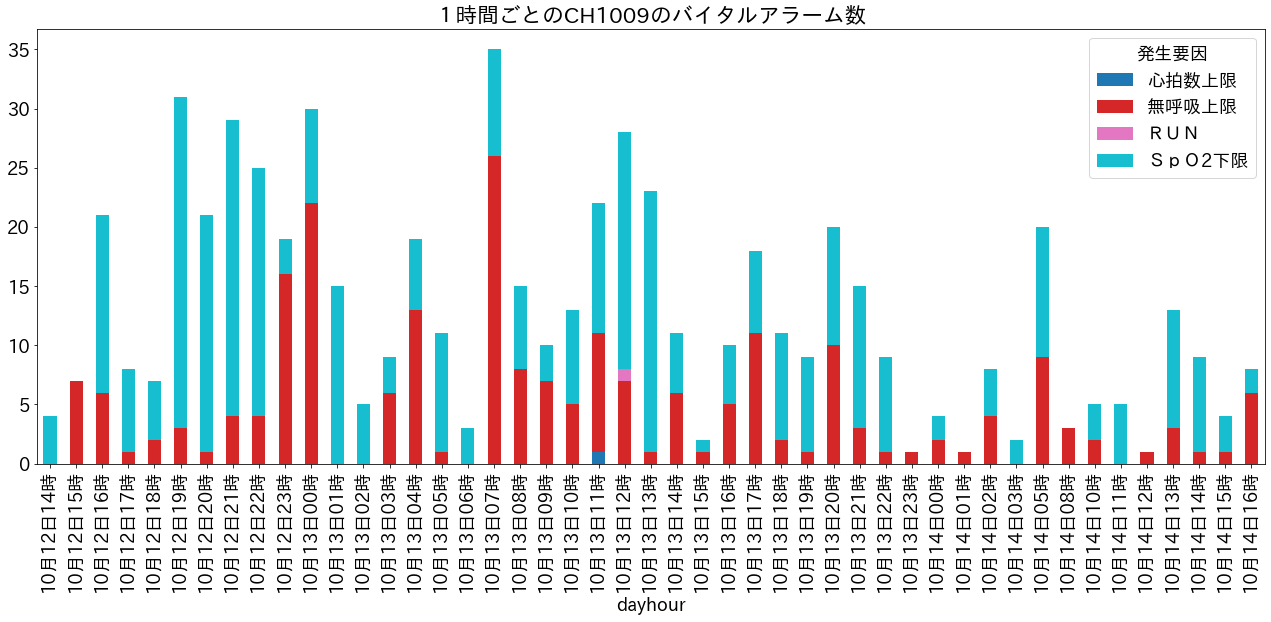

In [4]:
# 特定のCHの１時間毎のデータを積み上げ棒グラフで表示
ch = "CH1009"
pt = pd.pivot_table(
    df.query(f"alarm_level == 'H' and 床番号 == '{ch}'"),
    index=['dayhour'],
    columns='発生要因', 
    values='コード', 
    aggfunc=len, 
    fill_value=0
)
pt.plot.bar(figsize=figsize_,  title=f"１時間ごとの{ch}のバイタルアラーム数", stacked=True, colormap='tab10')

<AxesSubplot:title={'center':'１時間ごとのCH1009のSpO2下限アラーム数'}, xlabel='dayhour'>

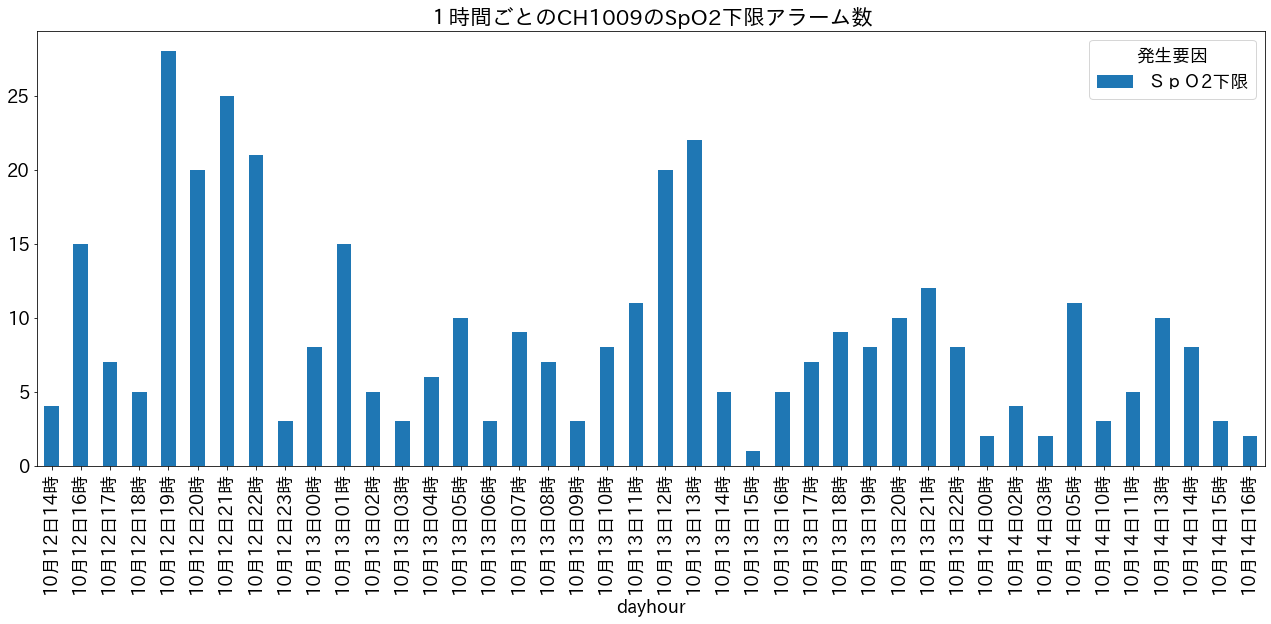

In [5]:
# 特定のCHの特定アラームの１時間毎のデータを積み上げ棒グラフで表示
alarm_code = "0x1010"
alarm_name = FukudaCsv.ALARM_CODE[alarm_code]
pt = pd.pivot_table(
    df.query(f"床番号 == '{ch}' and コード == '{alarm_code}'"),
    index=['dayhour'],
    columns='発生要因', 
    values='コード', 
    aggfunc=len, 
    fill_value=0
)
pt.plot.bar(figsize=figsize_, title=f"１時間ごとの{ch}の{alarm_name}アラーム数", stacked=True, colormap='tab10')